In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import random 
import seaborn as sns
from math import log2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# calling helper funtions
import data_prepare as dp
import data_viz as dviz
import data_split as ds
import tree_build as tb
import prediction as pred

In [12]:
df = pd.read_csv("data/3rd.csv")
X = np.array(df[df.columns[:-1]].values.tolist(), dtype=np.float64)
label = np.array(df[df.columns[-1]].values.tolist())
index = 0
to_split = [X, label, index]
t_split = to_split
tree_depth = 4
epochs = 1000
min_pts = 5
tree = np.zeros((2**tree_depth, 5))
next_free = 0

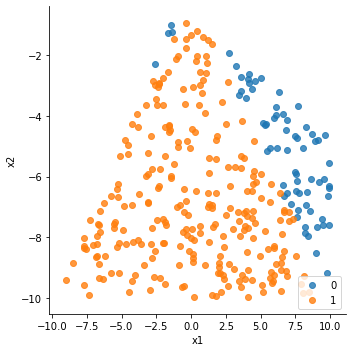

In [13]:
dviz.viz_data_np(to_split)

C:\Users\subash\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\subash\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\subash\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:64: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`

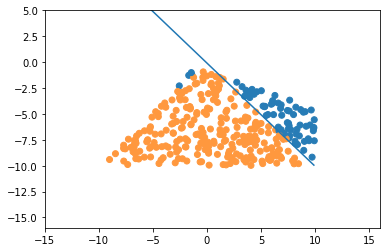

In [14]:
#to_split = df

for depth in range(tree_depth):
    tmp_split = []
    
    # shfuffling for each node
    #to_split = shuffle(to_split)
    
    if len(to_split) != 0:        
            
        X2 = to_split[0]
        label2 = to_split[1]
        #X2, label2, pos, neg = dp.data_giver(to_split)
        pos, neg = dp.pos_neg_giver(to_split)

        # best_gain; highest the information gain will be good
        best_gain = 0
        # best_theta = coefficient or line
        best_theta = []
        # best_pos_side, best_neg_side = data points for pos and negative after the best_gain split
        best_pos_side = []
        best_neg_side = []

        for epoch in range(epochs):
            # find random feature points as linear combination
            p = random.choice(pos)
            n = random.choice(neg)

            # getting parameters from split
            gain, pos_side, neg_side, theta = ds.split_data(X2, label2, pos, neg, p, n)
            #print(gain)

            # checking for best gain and setting rest parameters of it
            if gain > best_gain:
                best_gain = gain
                best_pos_side = pos_side
                best_neg_side = neg_side
                best_theta = theta
                
                #dviz.viz_data_with_line(best_theta, to_split)
            #dviz.viz_data_with_line(best_theta, to_split)

        # building tree
        if depth != tree_depth:
            # check left node's purity
            pos_idx = np.where(label2[[best_pos_side]] == 1)
            neg_idx = np.where(label2[[best_pos_side]] == 0)

            if len(pos_idx) == 0 or len(neg_idx) == 0:
                print("pure node found in left\n")
            else:
                if len(pos_idx[0]) > min_pts and len(neg_idx[0]) > min_pts:

                    # making sub dataframe for left
                    left_x = X2[best_pos_side]
                    left_label = label2[best_pos_side]
                    next_free += 1
                    
                    tree[to_split[2]][3] = next_free
                    tmp_split = [left_x, left_label, next_free]
                    #tmp_split = pd_concat(left_x, left_label)

            # check right node's purity
            pos_idx = np.where(label2[[best_neg_side]] == 1)
            neg_idx = np.where(label2[[best_neg_side]] == 0)

            if len(pos_idx) == 0 or len(neg_idx) == 0:
                print("pure node found in right\n")
            else:
                if len(pos_idx[0]) > min_pts and len(neg_idx[0]) > min_pts:

                    # making sub dataframe for left
                    right_x = X2[best_neg_side]
                    right_label = label2[best_neg_side]                    
                    next_free += 1
                    
                    
                    tree[to_split[2]][4] = next_free
                    
                    tmp_split = [right_x, right_label, next_free]
                    #tmp_split = pd_concat(right_x, right_label)
        
            tree[to_split[2]][:3] = best_theta.T
                         
        # ploting graph
        
        dviz.viz_data_with_line_np(best_theta, to_split)
        #dviz.scatter_plot_line(best_theta, to_split)
        
    #dviz.viz_data_with_line(best_theta, to_split)
    to_split = tmp_split        
    

In [11]:
tree

array([[-0.7676899 , -0.64082152,  0.80354062,  1.        ,  0.        ],
       [-0.31254603, -0.94990262, -2.99346678,  0.        ,  2.        ],
       [ 0.55197682, -0.83385945, -0.40988855,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0. 

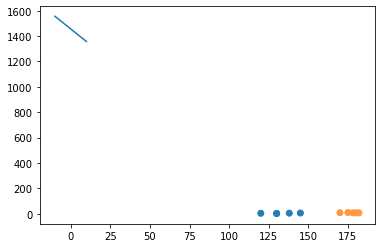

In [5]:
theta_f = list(tree[0].flat)
df = pd.DataFrame(t_split[0].tolist(), columns=['x1', 'x2'])
#https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

x1 = np.arange(-10,10, 0.1)
x2 = (-theta_f[2] - theta_f[0] * x1) / theta_f[1]
#x2 = - (theta_f[2] + np.dot(theta_f[0], x1)) / theta_f[1]
plt.plot(x1, x2)

categories = t_split[1]
colormap = np.array(['#277CB6', '#FF983E'])
plt.scatter(df.x1, df.x2, c=colormap[categories])



In [8]:
t_split[0].max()

9.988737800000001

In [20]:
plot_x = [np.min(X[:,0]-2), np.max(X[:,1]+2)]
plot_y = -1/theta_f[2]*(theta_f[0] 
          + np.dot(theta_f[1],plot_x))  

mask = y.flatten() == 1
decision_boun = plt.plot(plot_x, plot_y)
adm = plt.scatter(X[mask][:,0], X[mask][:,1])
not_adm = plt.scatter(X[~mask][:,0], X[~mask][:,1])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

NameError: name 'y' is not defined

In [69]:
x_vals

array([0., 1.])

In [21]:
print(pred.predict(tree, X[7]))

y_pred = pred.predict(tree, X)
print(classification_report(label, y_pred, labels=[0, 1]))
print(accuracy_score(label, y_pred))
print(confusion_matrix(label, y_pred))

0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

1.0
[[5 0]
 [0 5]]


In [15]:
#dviz.scatter_plot(to_split)

In [ ]:
how to prepare for tree structure 
if l1 >= something or if l1:
    left: pure set of 0 label
    right: if l2 or l2 >= something
        left: l3
            left: 0
            right: 1
        right:
            left: l4
                left/right:0
            right: 0
                

this can be done by analyzing each line creation; use visuals
then prepare for tree before computing or find way to build from tree object
